# Intelligent Mammogram Mass Analysis and Segmentation (IMMAS)

## Module import

In [1]:
%matplotlib inline

import immas
import matplotlib.pyplot as plt

In [2]:
immas.test()

Hello World!


## Reading files

This example shows how to read one image and create MammogramImage file

No masses on ground truth image are present


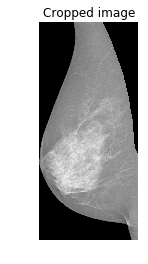

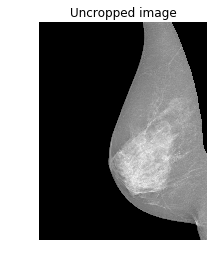

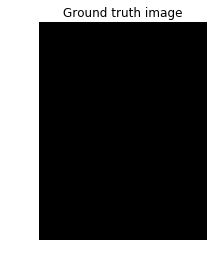

In [3]:
from immas import MammogramImage

path_image = "../dataset/images/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"

# contructor will automatically read data, if contrary not specified
# pectoral muscle will be removed from image if we have corresponding mask available
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)

# check whether this image has ground truth segmentation result available
if mm.has_masses:
    print('Masses are present on ground truth image')
else:
    print('No masses on ground truth image are present')

# attribute .image_data contains actual image cropped according to the masks    
plt.imshow(mm.image_data, cmap="gray")
plt.axis('off')
plt.title('Cropped image')
plt.show()

#attribute .image_data contains actual image cropped according to the masks   
plt.imshow(mm.uncropped_image, cmap="gray")
plt.axis('off')
plt.title('Uncropped image')
plt.show()

plt.imshow(mm.image_ground_truth, cmap="gray")
plt.axis('off')
plt.title('Ground truth image')
plt.show()

This example shows how to read whole dataset

In [4]:
from immas.io import read_dataset
import cv2

data_set = read_dataset(image_folder="../dataset/images",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks")

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 101, number of images for testing is 307


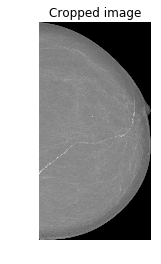

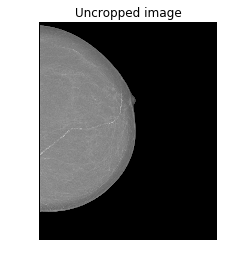

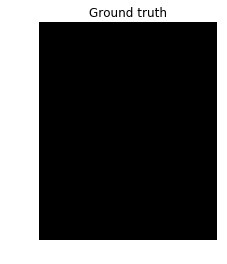

In [5]:
# let's show an example image from train subset of images, that has also a ground truth image
for img in data_set["train"]:
    mammogram = img
    mammogram.read_data()
    break


plt.imshow(mammogram.image_data, cmap="gray")
plt.axis('off')
plt.title('Cropped image')
plt.show()

plt.imshow(mammogram.uncropped_image, cmap="gray")
plt.axis('off')
plt.title('Uncropped image')
plt.show()

plt.imshow(mammogram.image_ground_truth, cmap="gray")
plt.axis('off')
plt.title('Ground truth')
plt.show()

## Enhancement - PreProcessing

In [6]:
# Defines function to apply preprocessing techniques.
# This can be used to try different parameters for the preprocessing functions.
# Also can be used to try those functions in different orders.

from immas import preprocessing

def testPreProcessing (img):
    img = preprocessing.resize(img)
    #img = preprocessing.open(img)
    #img = preprocessing.close(img)
    #img = preprocessing.erode(img)
    #img = preprocessing.dilate(img)
    #img = preprocessing.clahe(img)
    img = preprocessing.morphoEnhancement(img)
    img = preprocessing.waveletTransform(img)
    return img

In [ ]:
# Applies the preprocessing techniques defined above in the entire dataset (both training and test sets)

img = data_set["train"]
for m in img:
    m.read_data()
    m.image_data = testPreProcessing(m.image_data)
    #plt.imshow(m.image_data, cmap="gray")
    plt.show()

img = data_set["test"]
for m in img:
    m.read_data()
    m.image_data = preprocessing.fullPreprocessing(m.image_data)

# plt.imshow(m.image_data, cmap="gray")
# cv2.imwrite('preprocessed_img.png',m.image_data)

## Showing Images using OpenCV or Matplotlib

In [ ]:
from immas.basic_functions import show_image_cv, show_image_plt

show_image_cv(img, "Test Image")
show_image_plt(img, "Test Image")